# Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For example, the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sompy
from sompy.sompy import SOMFactory
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,0.038544,0.011208,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,-0.000385,0.005170,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,0.080500,0.015296,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,-0.024479,0.004101,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,-0.004125,0.021019,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [3]:
df.dropna(axis=1, inplace=True)

In [4]:
df.shape

(3193, 442)

In [5]:
scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)

In [6]:
names = df.columns

In [7]:
sm = SOMFactory().build(X, normalization = 'var', mapsize=(15,15), initialization='pca')
sm.train(n_job=1, verbose='info', train_rough_len=20, train_finetune_len=20)

 Training...
 pca_linear_initialization took: 0.042000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 20

 epoch: 1 ---> elapsed time:  0.114000, quantization error: 12.644342

 epoch: 2 ---> elapsed time:  0.117000, quantization error: 11.806780

 epoch: 3 ---> elapsed time:  0.117000, quantization error: 11.179411

 epoch: 4 ---> elapsed time:  0.116000, quantization error: 10.799508

 epoch: 5 ---> elapsed time:  0.113000, quantization error: 10.665098

 epoch: 6 ---> elapsed time:  0.118000, quantization error: 10.608932

 epoch: 7 ---> elapsed time:  0.118000, quantization error: 10.565816

 epoch: 8 ---> elapsed time:  0.118000, quantization error: 10.526083

 epoch: 9 ---> elapsed time:  0.118000, quantization error: 10.485228

 epoch: 10 ---> elapsed time:  0.117000, quantization error: 10.437469

 epoch: 11 ---> elapsed time:  0.229000, quantization error: 10.394505

 epoch: 12 ---> elapsed time:  0.116000, quantization error: 10.351772

 

In [8]:
def knn_elbow(df, k_range=20, plot=True):
    from sklearn.cluster import KMeans
    scores = {}
    for i in range(1, k_range+1):
        kmeans = KMeans(n_clusters=i)
        clusters_fit = kmeans.fit_predict(df)
        scores[i] = kmeans.inertia_
    if plot == True:
        pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))
        plt.title('Elbow KMeans')
        plt.xlabel('K')
        
    return scores

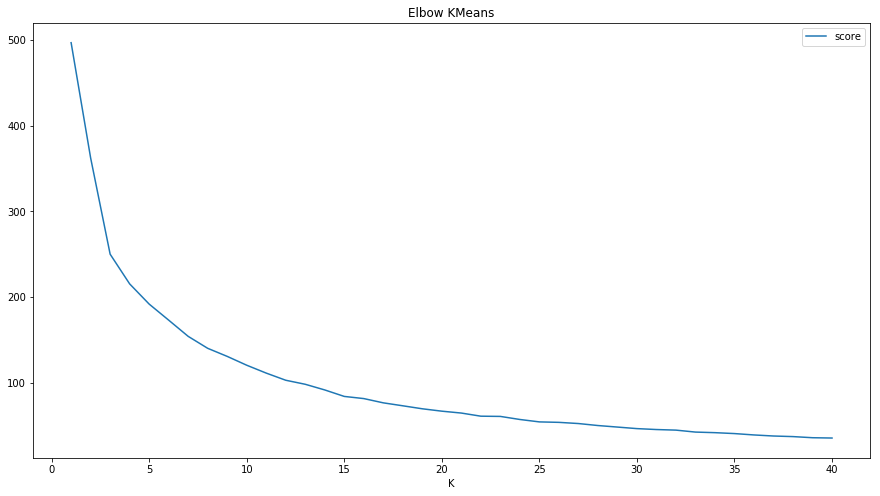

In [9]:
som_scores = knn_elbow(sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix), 40)

In [10]:
clusters = sm.cluster(n_clusters=5)

In [11]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4], dtype=int32)

In [12]:
map_dict = {}
for i, j in enumerate(clusters):
    map_dict[i] = j

In [13]:
assignment = pd.DataFrame(sm._bmu).T
assignment[0] = assignment[0].astype(int)
assignment.head()

,0,1
0,9,7.378489
1,82,6.022640
2,164,8.460921
3,60,8.153245
4,161,9.730737


In [14]:
cluster_assignments = assignment[0].map(map_dict)
df_assigned = df.reset_index().join(pd.DataFrame(cluster_assignments))

## t-SNE

In [15]:
dimred = TSNE()
plot_df = dimred.fit_transform(X)
plot_df = pd.DataFrame(plot_df).join(df.reset_index())
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,12.932951,-46.385674,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,...,0.223496,0.011494,-0.210375,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,9.910875,-8.033776,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,...,0.025899,-0.020202,0.000000,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,-60.350109,-5.350059,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,...,-1.051576,1.199713,4.327089,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,48.651585,9.053603,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,...,0.000000,0.000000,-0.011799,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,-19.085709,-44.401459,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,...,-5.324750,-4.619799,0.424460,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [16]:
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)

plot_df = plot_df.merge(agg, how='left', on='sku_key')

In [17]:
listof = {}
for i, j in enumerate(plot_df['sku_department'].unique()):
    listof[j] = i

In [18]:
plot_df['sku_department'] = plot_df['sku_department'].map(listof)

## Silhouette Score on t-SNE

Method 1: Packt Publishing Github Repository

https://github.com/PacktPublishing/Python-Machine-Learning-Cookbook/blob/master/Chapter04/performance.py

In [19]:
scores = []
range_values = np.arange(2, 11)
for i in range_values:
    # Train the model
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(plot_df[[0,1]])
    score = metrics.silhouette_score(plot_df[[0,1]], kmeans.labels_, 
                metric='euclidean', sample_size=len(plot_df[[0,1]]))
    
    print ("\nNumber of clusters =", i)
    print ("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.39525756

Number of clusters = 3
Silhouette score = 0.4426843

Number of clusters = 4
Silhouette score = 0.43774346

Number of clusters = 5
Silhouette score = 0.4106103

Number of clusters = 6
Silhouette score = 0.419811

Number of clusters = 7
Silhouette score = 0.39925182

Number of clusters = 8
Silhouette score = 0.40735784

Number of clusters = 9
Silhouette score = 0.42092443

Number of clusters = 10
Silhouette score = 0.4225005


Text(0.5,1,'Silhouette Score vs Number of Clusters')

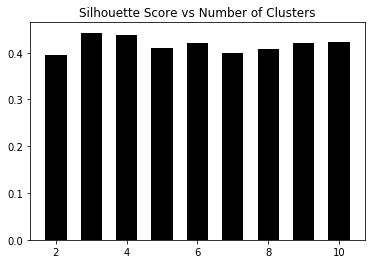

In [20]:
# Plot scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette Score vs Number of Clusters')

Method 2: From sklearn.org

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(plot_df[[0,1]])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

Text(0.5,1,'Silhouette Average vs Number of Clusters')

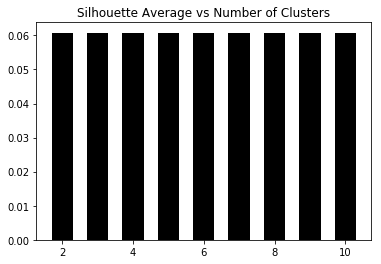

In [24]:
# Plot scores
plt.figure()
plt.bar(range_n_clusters, silhouette_avg, width=0.6, color='k', align='center')
plt.title('Silhouette Average vs Number of Clusters')

## Silhouette Score on t-SNE K-means

In [25]:
scores = {}
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i)
    clusters_fit = kmeans.fit_predict(plot_df[[0,1]])
    scores[i] = kmeans.inertia_

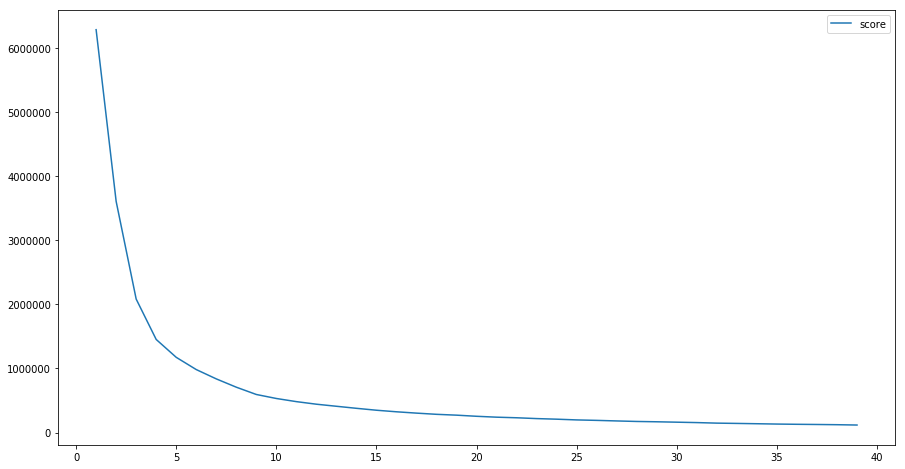

In [27]:
pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))

In [28]:
kmeans = AgglomerativeClustering(n_clusters=8)

In [29]:
clusters_fit = kmeans.fit_predict(plot_df[[0,1]])

In [30]:
tsne_cluster = plot_df.join(pd.DataFrame(clusters_fit), rsuffix='clus')
tsne_cluster.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)
tsne_cluster.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,Unnamed: 0,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,12.932951,-46.385674,28,455.0,197.0,0.037634,0.029179,0.001996,-0.144064,0.384898,...,0.0,0.621100,0.0,28,0,0,06,063,20G,3
1,9.910875,-8.033776,34,186.0,215.0,0.012515,0.009124,0.001133,1.041851,-0.009029,...,0.0,0.236220,0.0,34,1,0,4,11,35A,5
2,-60.350109,-5.350059,100,6946.0,1473.0,0.103166,0.098672,0.003380,3.094165,0.537989,...,0.0,5.145510,1.0,100,2,1,02,38,C09,4
3,48.651585,9.053603,152,78.0,87.0,0.047344,0.040570,0.001866,1.339545,-0.589187,...,0.0,0.109897,0.0,152,3,1,02,139,00L,6
4,-19.085709,-44.401459,182,4038.0,1035.0,0.021164,0.013509,0.004767,4.693662,-0.023617,...,0.0,4.060313,1.0,182,4,0,8,33,16K,1


In [ ]:
# for i in tsne_cluster['cluster'].unique():
#     ax.scatter(tsne_cluster[tsne_cluster['cluster'] == i]['tsne1'], tsne_cluster[tsne_cluster['cluster'] == i]['tsne2'],
#     color=colors[i], label=i)           


In [50]:
kmeans = AgglomerativeClustering(n_clusters=8).fit(plot_df[[0,1]])
kmeans.labels_

array([3, 5, 4, ..., 0, 0, 0])

Method 1: Packt Publishing Github Repository

https://github.com/PacktPublishing/Python-Machine-Learning-Cookbook/blob/master/Chapter04/performance.py

In [55]:
scores = []
range_values = np.arange(2, 11)
for i in range_values:
    kmeans = AgglomerativeClustering(n_clusters=i).fit(plot_df[[0,1]])
    #clusters_fit = kmeans.fit_predict(plot_df[[0,1]])
    score = metrics.silhouette_score(tsne_cluster[['tsne1','tsne2']], kmeans.labels_, 
                metric='euclidean', sample_size=len(tsne_cluster[['tsne1','tsne2']]))

    print ("\nNumber of clusters =", i)
    print ("Silhouette score =", score)

    scores.append(score)


Number of clusters = 2
Silhouette score = 0.37144747

Number of clusters = 3
Silhouette score = 0.42860577

Number of clusters = 4
Silhouette score = 0.41701695

Number of clusters = 5
Silhouette score = 0.38265136

Number of clusters = 6
Silhouette score = 0.3900172

Number of clusters = 7
Silhouette score = 0.36915883

Number of clusters = 8
Silhouette score = 0.37294748

Number of clusters = 9
Silhouette score = 0.37118122

Number of clusters = 10
Silhouette score = 0.36209556


Text(0.5,1,'Silhouette Score vs Number of Clusters')

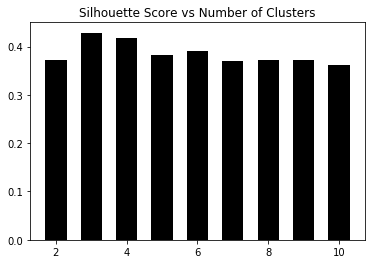

In [57]:
# Plot scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette Score vs Number of Clusters')

Method 2: From sklearn.org

For n_clusters = 2 The average silhouette_score is : 0.37144747
For n_clusters = 3 The average silhouette_score is : 0.4286058
For n_clusters = 4 The average silhouette_score is : 0.41701692
For n_clusters = 5 The average silhouette_score is : 0.3826514
For n_clusters = 6 The average silhouette_score is : 0.3900172
For n_clusters = 7 The average silhouette_score is : 0.36915886
For n_clusters = 8 The average silhouette_score is : 0.37294748
For n_clusters = 9 The average silhouette_score is : 0.37118122
For n_clusters = 10 The average silhouette_score is : 0.36209553


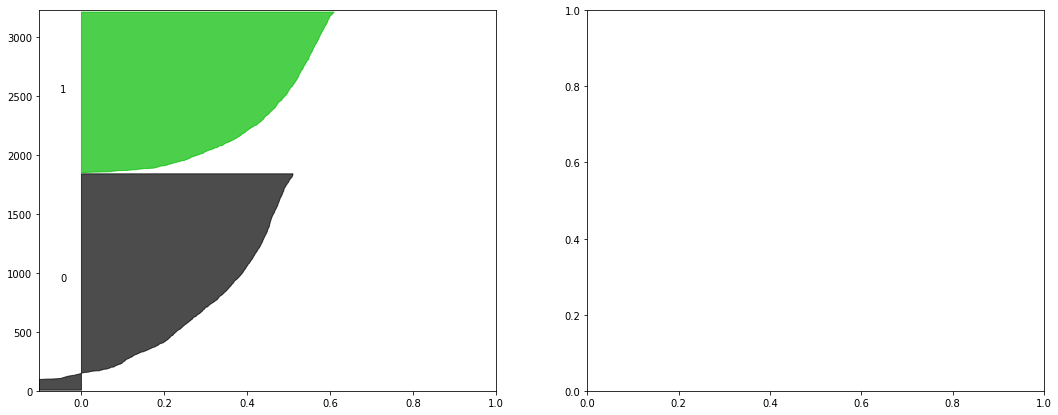

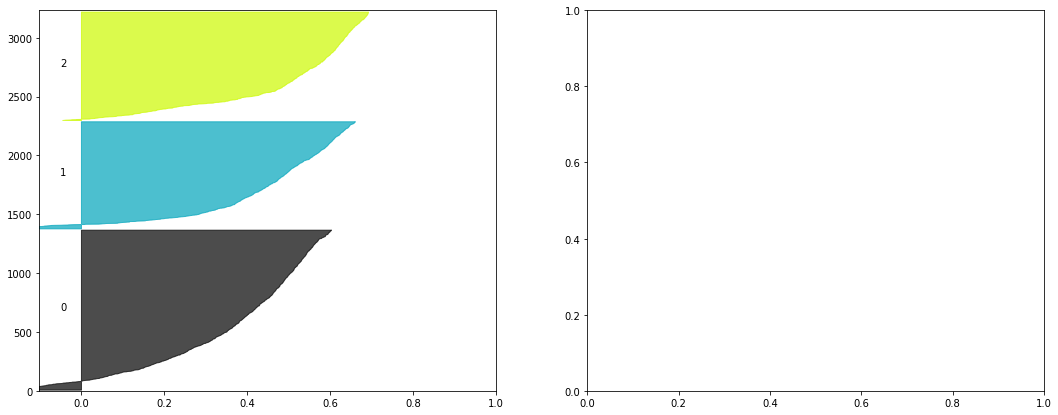

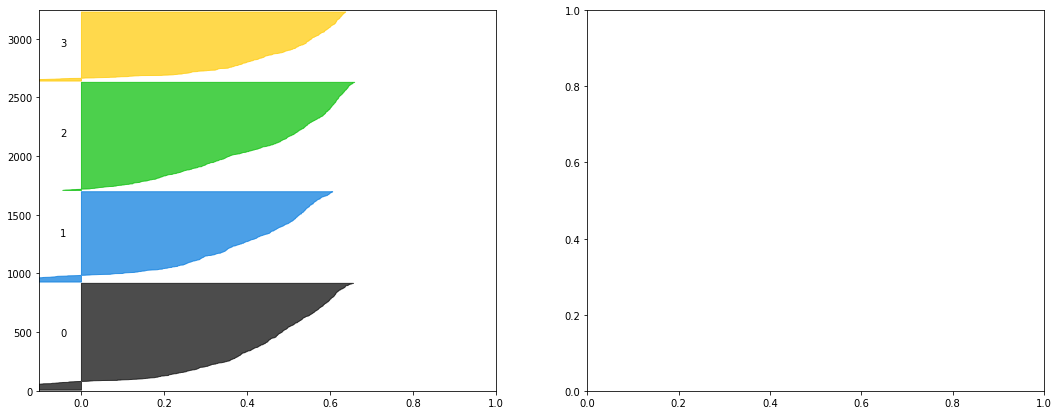

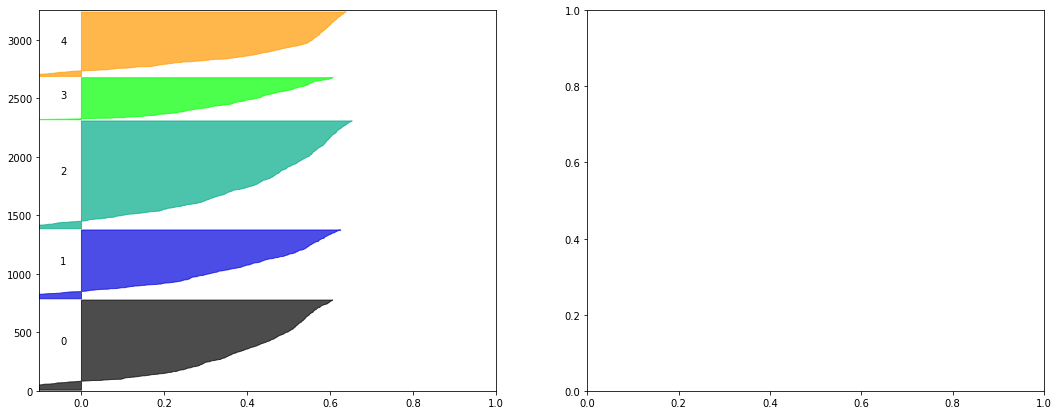

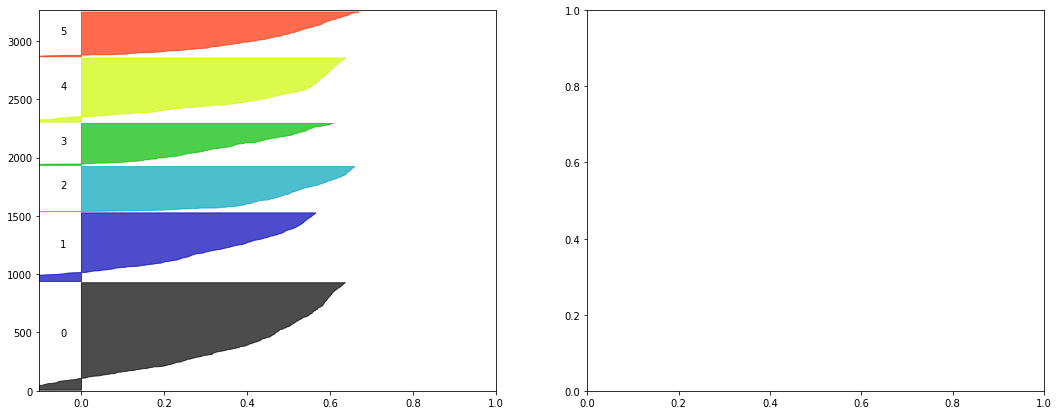

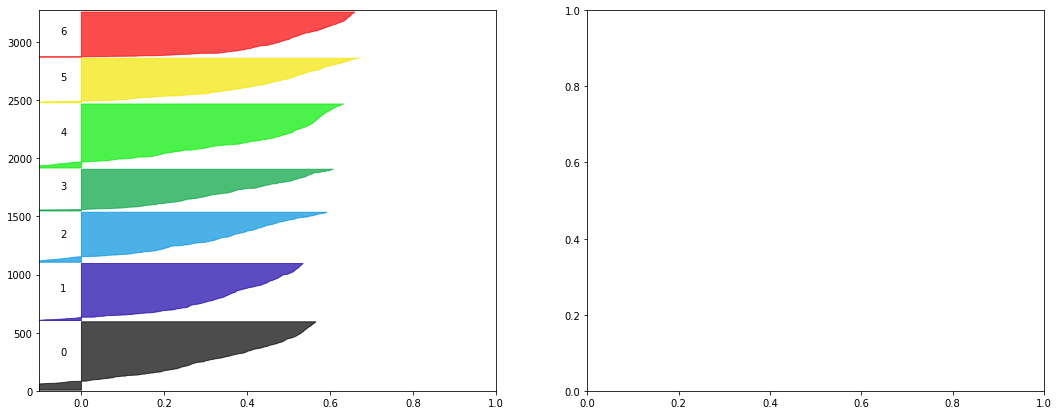

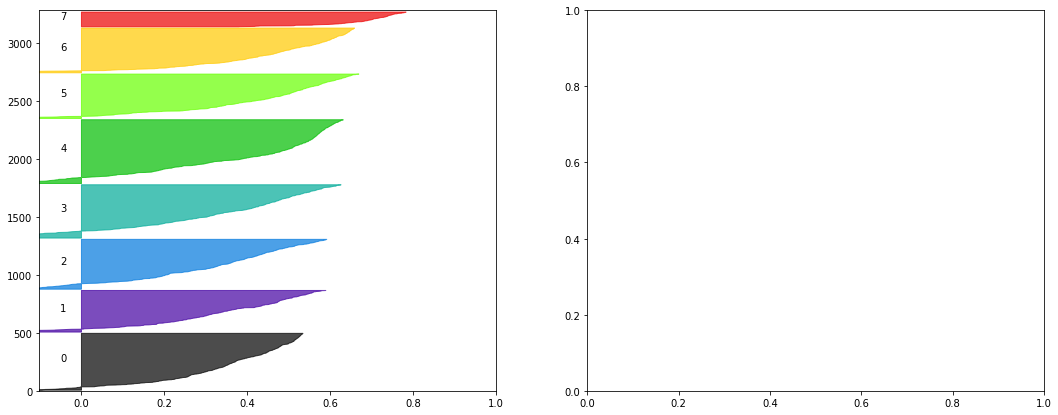

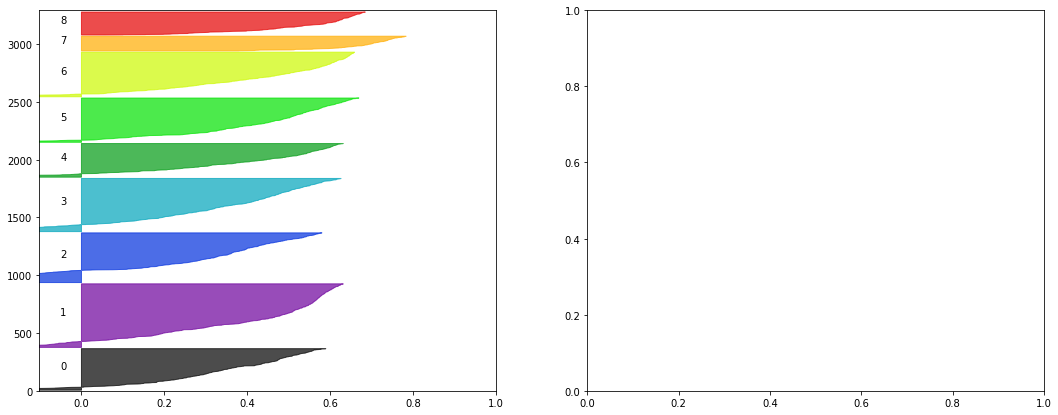

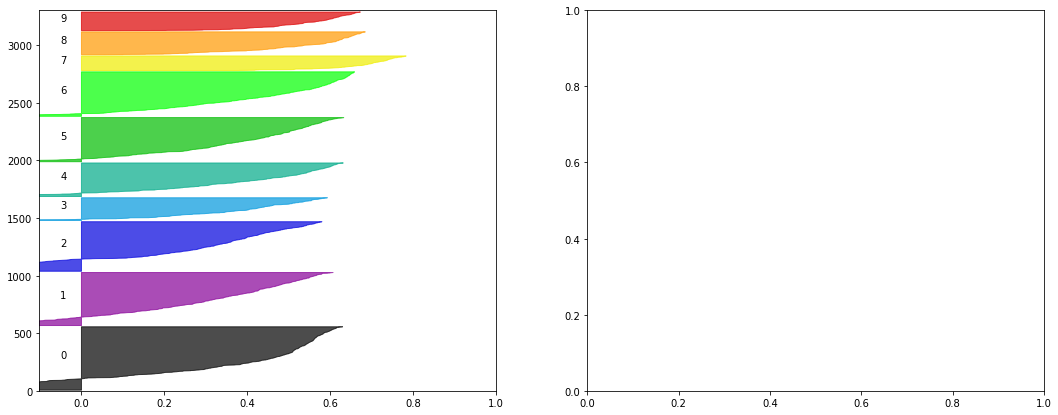

In [59]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans = AgglomerativeClustering(n_clusters=n_clusters).fit(plot_df[[0,1]])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tsne_cluster[['tsne1','tsne2']], kmeans.labels_)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tsne_cluster[['tsne1','tsne2']], kmeans.labels_)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

Text(0.5,1,'Silhouette Average vs Number of Clusters')

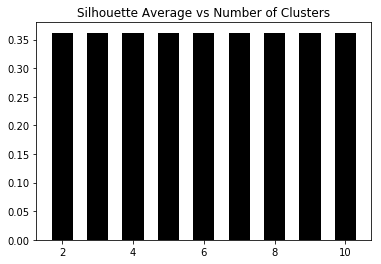

In [60]:
# Plot scores
plt.figure()
plt.bar(range_n_clusters, silhouette_avg, width=0.6, color='k', align='center')
plt.title('Silhouette Average vs Number of Clusters')